In [54]:
pip install opencv-python


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Chargement des bibliothèques 

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Chargement du Classifieur

In [56]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Vérifier si le classifieur a été chargé correctement
if face_cascade.empty():
    print("Erreur : Le fichier XML du classifieur n'a pas pu être chargé.")
else:
    print("Classifieur en cascade (AdaBoost + Cascade) chargé avec succès.")

# Charger l'image couleur (nous en aurons besoin pour l'affichage final)
# NOTE : OpenCV charge les images en format BGR (Bleu-Vert-Rouge) par défaut.
image_couleur = cv2.imread('test_image.jpg')

if image_couleur is None:
    print("Erreur : L'image 'test_image.jpg' n'a pas pu être chargée. Vérifiez le nom et le chemin.")

Classifieur en cascade (AdaBoost + Cascade) chargé avec succès.


## Pré-traitement de l'Image

In [57]:
# --- 2. PRÉ-TRAITEMENT : CONVERSION EN NIVEAUX DE GRIS ---

# 1. Redimensionner l'image si elle est trop grande (facultatif mais recommandé)
# Nous allons garder la taille originale pour l'instant.

# 2. Convertir l'image en niveaux de gris
# La détection est plus rapide et efficace en niveaux de gris.
gray = cv2.cvtColor(image_couleur, cv2.COLOR_BGR2GRAY)
print("Image convertie en niveaux de gris pour la détection.")

Image convertie en niveaux de gris pour la détection.


## La Première Détection (Brute)

In [58]:
# --- 3. DÉTECTION DES VISAGES PAR LA CASCADE ---

# Appel de la fonction de détection
# Les paramètres sont ici les paramètres "de base" du Membre 2/3.

faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.3,      # Plus de détails plus tard (Membre 3)
    minNeighbors=12,       # Plus de détails plus tard (Membre 3)
    minSize=(30, 30)
)

print(f"Détection terminée. {len(faces)} visage(s) trouvé(s).")

Détection terminée. 10 visage(s) trouvé(s).


## 

In [59]:
# --- 4. VISUALISATION DES RÉSULTATS (DÉTECTION BRUTE) ---

# Dessiner les rectangles autour des visages détectés
# On parcourt la liste des coordonnées (x, y, largeur w, hauteur h)

# NOTE: Nous allons utiliser une copie de l'image couleur originale
# pour l'affichage de la détection brute, puis la modifier à nouveau
# pour l'étape de floutage (Étape 5).
image_brute = image_couleur.copy()

for (x, y, w, h) in faces:
    # Dessiner un rectangle sur l'image_brute
    # Arguments: (image, coin_sup_gauche, coin_inf_droit, couleur BGR, épaisseur)
    
    # Le rectangle est dessiné sur l'image de la détection brute.
    # Couleur BGR (0, 0, 255) correspond au ROUGE (car l'ordre est Bleu, Vert, Rouge dans OpenCV)
    cv2.rectangle(image_brute, (x, y), (x + w, y + h), (0, 0, 255), 3)

print("Rectangles de détection dessinés sur l'image.")

Rectangles de détection dessinés sur l'image.


## Affichage

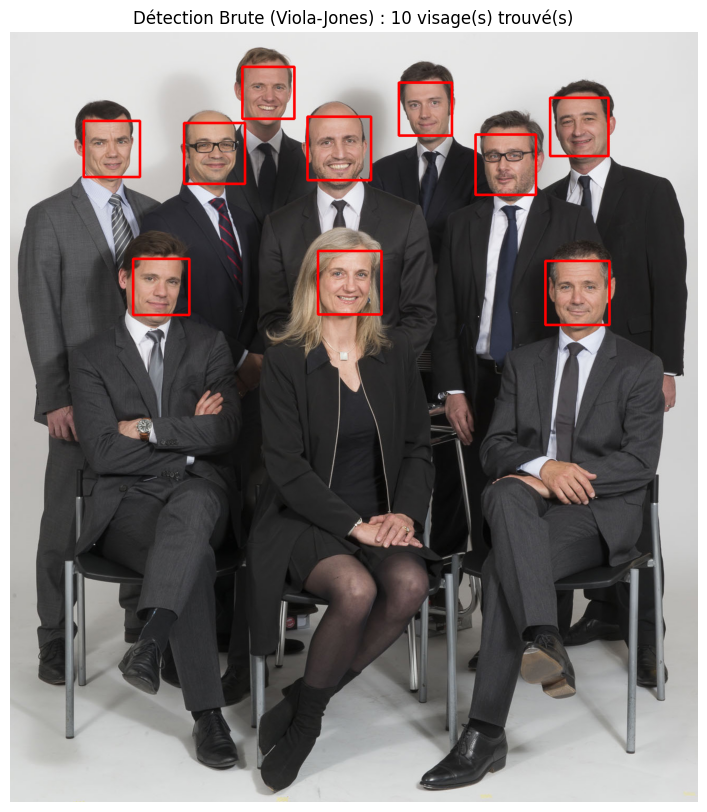

In [60]:
# --- 5. AFFICHAGE DANS JUPYTER ---

# Convertir l'image BGR (OpenCV) en RGB (Matplotlib) pour un affichage correct
image_rgb = cv2.cvtColor(image_brute, cv2.COLOR_BGR2RGB)

# Afficher l'image dans le notebook
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title(f"Détection Brute (Viola-Jones) : {len(faces)} visage(s) trouvé(s)")
plt.axis('off') # Masquer les axes
plt.show()

## Fonction d'Anonymisation

In [61]:
# --- 6. APPLICATION : ANONYMISATION PAR FLOUTAGE ---

# NOTE : Nous travaillons à nouveau sur la variable 'image_couleur' originale (non modifiée)
# ou une copie propre si vous voulez garder la détection brute.
# Utilisons l'image originale pour l'application finale.
image_anonyme = image_couleur.copy() 

# Le Flou Gaussien est un filtre de lissage idéal pour l'anonymisation.
# On parcourt chaque visage détecté
for (x, y, w, h) in faces:
    
    # 1. ISOLER LA RÉGION D'INTÉRÊT (ROI)
    # On extrait le tableau de pixels correspondant au visage
    # ATTENTION: Le format est [lignes (y):lignes+hauteur, colonnes (x):colonnes+largeur]
    roi_face = image_anonyme[y:y+h, x:x+w]
    
    # 2. APPLIQUER LE FLOUTAGE GAUSSIEN
    # (25, 25) est la taille du noyau (kernel size). Il doit être impair.
    # Plus ce chiffre est élevé, plus le flou est intense et l'anonymisation efficace.
    blurred_roi = cv2.GaussianBlur(roi_face, (25, 25), 0)
    
    # 3. RÉINTÉGRER LA ZONE FLOUTÉE DANS L'IMAGE
    # On remplace la région originale dans l'image anonyme
    image_anonyme[y:y+h, x:x+w] = blurred_roi
    
print("L'application d'anonymisation est terminée : tous les visages ont été floutés.")

L'application d'anonymisation est terminée : tous les visages ont été floutés.


## AFFICHAGE DE L'APPLICATION FINALE

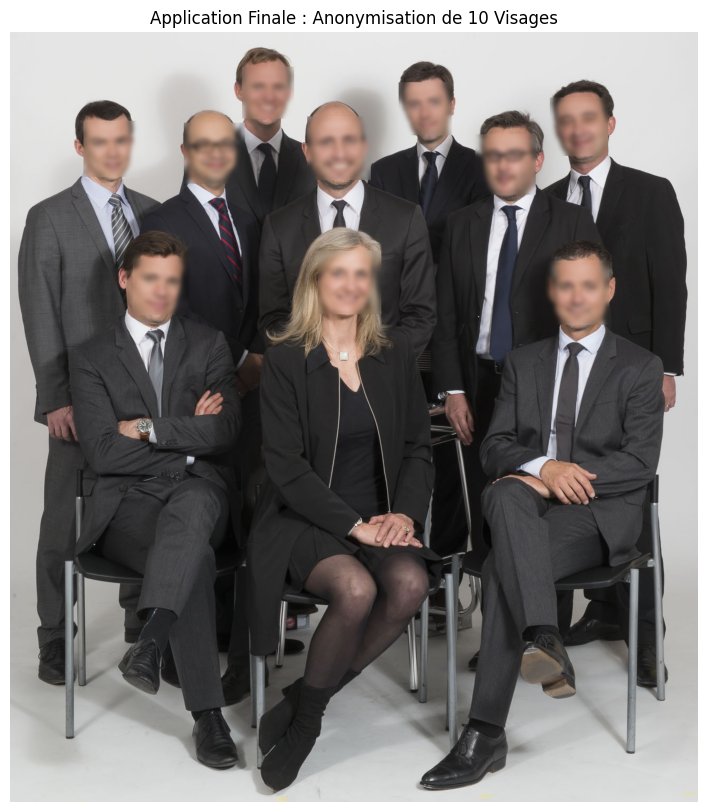

In [62]:
# --- 7. AFFICHAGE DE L'APPLICATION FINALE ---

# 1. Convertir l'image BGR (OpenCV) en RGB (Matplotlib)
image_rgb_anonyme = cv2.cvtColor(image_anonyme, cv2.COLOR_BGR2RGB)

# 2. Afficher l'image finale
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb_anonyme)
plt.title(f"Application Finale : Anonymisation de {len(faces)} Visages")
plt.axis('off')
plt.show()

## Manuellement 

In [63]:
# --- 1. CRÉATION DE L'IMAGE INTÉGRALE (Integral Image) ---

# Revenir à l'image en niveaux de gris (gray) de l'Étape 1
# Utiliser la fonction intégrée d'OpenCV pour générer l'Integral Image (pour la rapidité)
# Note : Coder cette fonction manuellement (en utilisant les sommes cumulées)
# est la meilleure preuve de compréhension si le temps le permet.

integral_image = cv2.integral(gray)
print("Image Intégrale calculée.")

Image Intégrale calculée.


In [64]:
def calculer_somme_rect(ii, x, y, w, h):
    """
    Calcule la somme des pixels d'un rectangle (x, y, w, h) en 4 références.
    ii : l'Image Intégrale.
    (x, y) : coin supérieur gauche du rectangle.
    (w, h) : largeur et hauteur.
    """
    
    # Rappel de la formule : Point 4 + Point 1 - (Point 2 + Point 3)
    # Les coordonnées ii ont un décalage de 1 (dû à la fonction cv2.integral)

    A = ii[y, x]              # Coin Supérieur Gauche (x, y)
    B = ii[y, x + w]          # Coin Supérieur Droit (x+w, y)
    C = ii[y + h, x]          # Coin Inférieur Gauche (x, y+h)
    D = ii[y + h, x + w]      # Coin Inférieur Droit (x+w, y+h)
    
    # La somme des pixels dans le rectangle est : D - B - C + A
    somme = int(D - B - C + A) 
    return somme

In [65]:
# --- 3. EXTRACTION D'UNE FEATURE DE HAAR (EXEMPLE) ---

# Définissons la position et la taille de notre fenêtre (simulant une fenêtre de détection 24x24)
x_start, y_start = 100, 100 
w_feature, h_feature = 50, 40

# Définir le premier rectangle (Noir - Gauche)
x_noir, y_noir, w_noir, h_noir = x_start, y_start, w_feature // 2, h_feature

# Définir le deuxième rectangle (Blanc - Droite)
x_blanc, y_blanc, w_blanc, h_blanc = x_start + w_feature // 2, y_start, w_feature // 2, h_feature

# Calculer les sommes en utilisant la fonction O(1)
somme_noir = calculer_somme_rect(integral_image, x_noir, y_noir, w_noir, h_noir)
somme_blanc = calculer_somme_rect(integral_image, x_blanc, y_blanc, w_blanc, h_blanc)

# Calculer la valeur de la Feature de Haar
valeur_feature = somme_noir - somme_blanc

print(f"\nValeur de la Feature de Haar (Noir - Blanc) : {valeur_feature}")

# Interprétation : 
if valeur_feature > 0:
    print("La zone 'Noire' est plus sombre que la zone 'Blanche' (Caractéristique détectée).")
else:
    print("La zone 'Blanche' est plus sombre (ou équivalente) à la zone 'Noire'.")


Valeur de la Feature de Haar (Noir - Blanc) : 2544
La zone 'Noire' est plus sombre que la zone 'Blanche' (Caractéristique détectée).


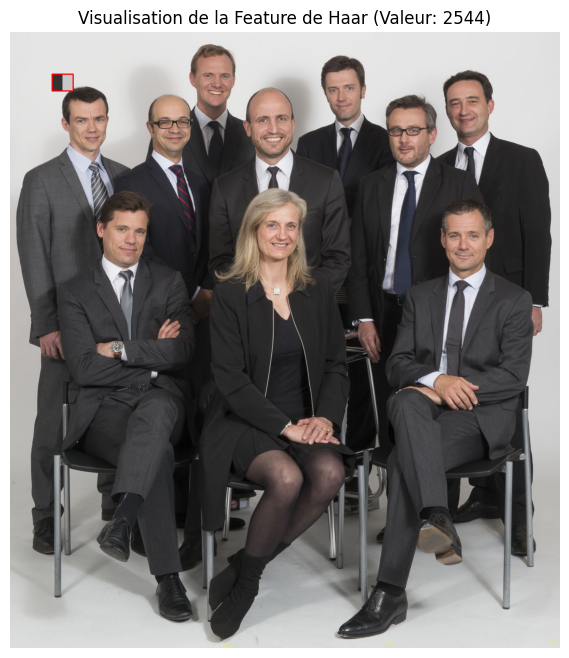

In [68]:
# --- 4. VISUALISATION DE LA FEATURE SUR L'IMAGE (CODE CORRIGÉ) ---

# 1. Utiliser une COPIE pour la visualisation
image_feature = image_couleur.copy()

# 2. Dessiner les rectangles REMPLIS pour l'effet de contraste

# Rectangle Noir (Gauche) : Rempli avec une couleur foncée (par exemple, 50 en BGR)
# NOTE : Utiliser -1 comme épaisseur pour remplir le rectangle.
cv2.rectangle(image_feature, (x_noir, y_noir), (x_noir + w_noir, y_noir + h_noir), (50, 50, 50), -1)

# Rectangle Blanc (Droite) : Rempli avec une couleur claire (par exemple, 200 en BGR)
cv2.rectangle(image_feature, (x_blanc, y_blanc), (x_blanc + w_blanc, y_blanc + h_blanc), (200, 200, 200), -1)

# Dessiner un CONTOUR autour de la feature complète (ROUGE) pour la délimiter
cv2.rectangle(image_feature, (x_start, y_start), (x_start + w_feature, y_start + h_feature), (0, 0, 255), 2)


# Affichage Matplotlib
image_rgb_feature = cv2.cvtColor(image_feature, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb_feature)
plt.title(f"Visualisation de la Feature de Haar (Valeur: {valeur_feature})")
plt.axis('off')
plt.show()